In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

##  The Novel Coronavirus: Data Science and Machine Learning Visualizations

This is the site where I pull the recent `.csv` files: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

Formats of the `.csv` files are bound to change.

This notebook uses the confimed, deaths, and recovered database

In [25]:
!ls

COVID19 Visualizations.ipynb
COVID19_worldwide.png
Icon?
graphs_by_countries
graphs_by_countries_legend
time_series_covid19_confirmed_global.csv
time_series_covid19_deaths_global.csv
time_series_covid19_recovered_global.csv


In [17]:
#Load the CSV files. Please make sure to pull the latest files from the website
COVID19_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
COVID19_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
COVID19_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

In [18]:
COVID19_confirmed.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,7,7,7,7,7,7,7
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,301,387,387,502,589,690,745,820,1054,1054
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,235,249,265,290,329,407,424,482,532,571
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,32,39,39,53,62,71,77,78,80,84
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,669,818,1029,1219,1405,1617,1791,2032,2032,2182


In [19]:
#Lat and Long data could be used later or map visualization
COVID19_confirmed = COVID19_confirmed.drop(['Lat', 'Long'], axis=1)
COVID19_deaths = COVID19_deaths.drop(['Lat', 'Long'], axis=1)
COVID19_recovered = COVID19_recovered.drop(['Lat', 'Long'], axis=1)

I don't know how to filter out the NaN for smaller countries for no provinces/states, so I split the data into two sections between big countries and small countries helper functions. Everything should work smoothly.

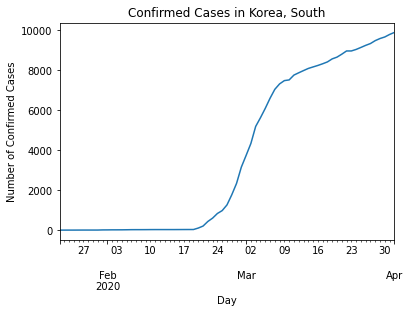

In [20]:
def small_country(country_name, data):
    country = data
    country = country.pivot_table(index=['Country/Region'])
    country.columns = pd.to_datetime(country.columns)
    country = country.groupby(level=[0], sort=False).sum()
    country = country.loc[country_name]
    country = country.sort_index().plot()
    
    if data.equals(COVID19_confirmed):
        dataType = "Confirmed Cases"
    elif data.equals(COVID19_recovered):
        dataType = "Recovered"
    elif data.equals(COVID19_deaths):
        dataType = "Deaths"
    
    #Labelings
    country.set_ylabel("Number of " + dataType)
    country.set_xlabel("Day")
    country.set_title(dataType + " in " + country_name)
    return country

def big_country(country_name, data):
    """
    This function is obsolete as of April 1st. Database changes causes the split to be uneccesary
    """
    country = data
    country = country.pivot_table(index=['Country/Region', 'Province/State'])
    country.columns = pd.to_datetime(country.columns)
    country = country.groupby(level=[0], sort=False).sum()
    country = country.loc[country_name]
    country = country.sort_index().plot()

    if data.equals(COVID19_confirmed):
        dataType = "Confirmed Cases"
    elif data.equals(COVID19_recovered):
        dataType = "Recovered"    
    elif data.equals(COVID19_deaths):
        dataType = "Deaths"
    
    #Labelings
    country.set_ylabel("Number of " + dataType)
    country.set_xlabel("Day")
    country.set_title(dataType + " in " + country_name)
    return country

def country(country_name, data):
    big_countries = []
    if country_name in big_countries:
        return big_country(country_name, data)
    else:
        return small_country(country_name, data)
    
country("Korea, South", COVID19_confirmed)

In [21]:
#Saves each graph for each country. Takes a long time to run and save (around 5 minutes)
def updateAllCountryGraphs():
    all_countries = list(COVID19_confirmed['Country/Region'])
    all_countries = list(dict.fromkeys(all_countries))
    data = [(COVID19_confirmed, "confirmed"), (COVID19_deaths, "deaths"), (COVID19_recovered, "recovered")]
    
    for Country in all_countries:
        for dataType in data:
            country(Country, dataType[0])
            plt.savefig("graphs_by_countries/" + Country + "_" + dataType[1] + ".png")
            plt.tight_layout()
            plt.clf()
            
updateAllCountryGraphs()

<Figure size 432x288 with 0 Axes>

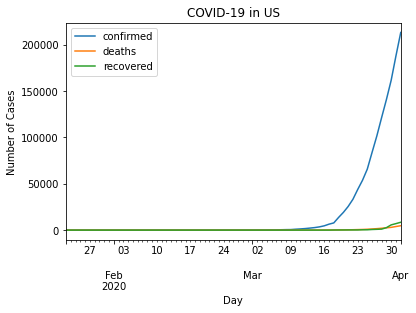

In [22]:
dataset = [(COVID19_confirmed, "confirmed"), (COVID19_deaths, "deaths"), (COVID19_recovered, "recovered")]

def small_country_legend(country_name):
    for data in dataset:
        country = data[0]
        country = country.pivot_table(index=['Country/Region'])
        country.columns = pd.to_datetime(country.columns)
        country = country.groupby(level=[0], sort=False).sum()
        country = country.loc[country_name]
        country = country.sort_index().plot(label=data[1])
    
    #Labelings
    country.set_ylabel("Number of Cases")
    country.set_xlabel("Day")
    country.set_title("COVID-19 in " + country_name)
    country.legend()
    return country 

def big_country_legend(country_name):
    for data in dataset:
        country = data[0]
        country = country.pivot_table(index=['Country/Region', 'Province/State'])
        country.columns = pd.to_datetime(country.columns)
        country = country.groupby(level=[0], sort=False).sum()
        country = country.loc[country_name]
        country = country.sort_index().plot(label=data[1])

    #Labelings
    country.set_ylabel("Number of Cases")
    country.set_xlabel("Day")
    country.set_title("COVID-19 in " + country_name)
    country.legend()
    return country 

def country_legend(country_name):
    big_countries = [] #['Australia', 'Canada', 'China', 'Cruise Ship', 
                       #'Denmark', 'France', 'Netherlands', 'US', 'United Kingdom']
    if country_name in big_countries:
        return big_country_legend(country_name)
    else:
        return small_country_legend(country_name)
    
country_legend('US')

In [23]:
def updateAllCountryGraphsLegend():
    all_countries = list(COVID19_confirmed['Country/Region'])
    all_countries = list(dict.fromkeys(all_countries))
    
    for Country in all_countries:
        country_legend(Country)
        plt.savefig("graphs_by_countries_legend/" + Country + "_all.png")
        plt.tight_layout()
        plt.clf()
            
updateAllCountryGraphsLegend()

<Figure size 432x288 with 0 Axes>

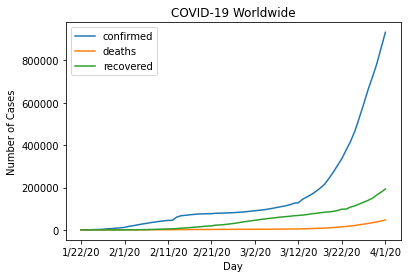

In [24]:
allCountries_confirmed = COVID19_confirmed.drop(['Country/Region', 'Province/State'], axis=1).sum()
allCountries_deaths = COVID19_deaths.drop(['Country/Region', 'Province/State'], axis=1).sum()
allCountries_recovered = COVID19_recovered.drop(['Country/Region', 'Province/State'], axis=1).sum()

def allCountries():
    world = allCountries_confirmed.plot(label="confirmed")
    world = allCountries_deaths.plot(label="deaths")
    world = allCountries_recovered.plot(label="recovered")
    
    #Labelings
    world.set_ylabel("Number of Cases")
    world.set_xlabel("Day")
    world.set_title("COVID-19 Worldwide")
    world.legend()
    plt.savefig("COVID19_worldwide")
    return world

allCountries()

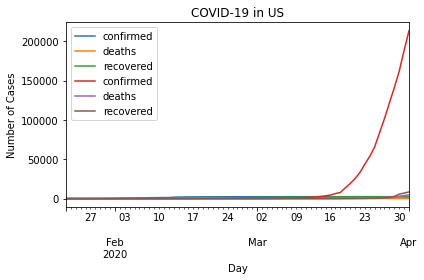

In [35]:
def customCountries(list_countries):
    all_countries = list(COVID19_confirmed['Country/Region'])
    all_countries = list(dict.fromkeys(all_countries))
    
    for Country in list_countries:
        country_legend(Country)
        
        plt.tight_layout()
        #plt.clf()
            
    plt.savefig(str(list_countries) + ".png")
    
customCountries(['China', 'US'])